In [3]:
import os
import csv
import numpy
import pandas
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [13]:
import pandas as pd
import numpy as np

# Membaca data dari CSV
csv_file = 'sensor_data_labeled.csv'
df = pd.read_csv(csv_file)

# df.rename(columns={
#     'label': 'kategori'
# }, inplace=True)

df = df.drop(columns=['epoch', 'humidity', 'pressure'])
df.head()


,dust,mq135,mq7,temperature,label
0,36,5982,4059,30.21,rendah
1,20,5989,4055,30.24,rendah
2,17,5985,4052,30.30,rendah
3,16,5981,4052,30.35,sedang
4,30,5968,4052,30.38,sedang


In [20]:
X = df[['dust', 'mq135', 'mq7', 'temperature']].values

y_labels = df['label'].values

In [15]:
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y_labels)
y_categorical = to_categorical(y_encoded)

In [24]:
model = Sequential([
    Dense(64, input_shape=(4,), activation='relu'),  # Layer pertama dengan 64 neuron
    BatchNormalization(),
    Dropout(0.3),  # Dropout untuk mencegah overfitting
    
    Dense(32, activation='relu'),  # Hidden layer kedua dengan 32 neuron
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(16, activation='relu'),  # Hidden layer ketiga dengan 16 neuron
    BatchNormalization(),
    Dropout(0.2),
    
    Dense(3, activation='softmax')  # Output layer dengan 3 neuron (3 kelas)
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X, y_categorical, epochs=50, batch_size=8, verbose=0, validation_split=0.2)

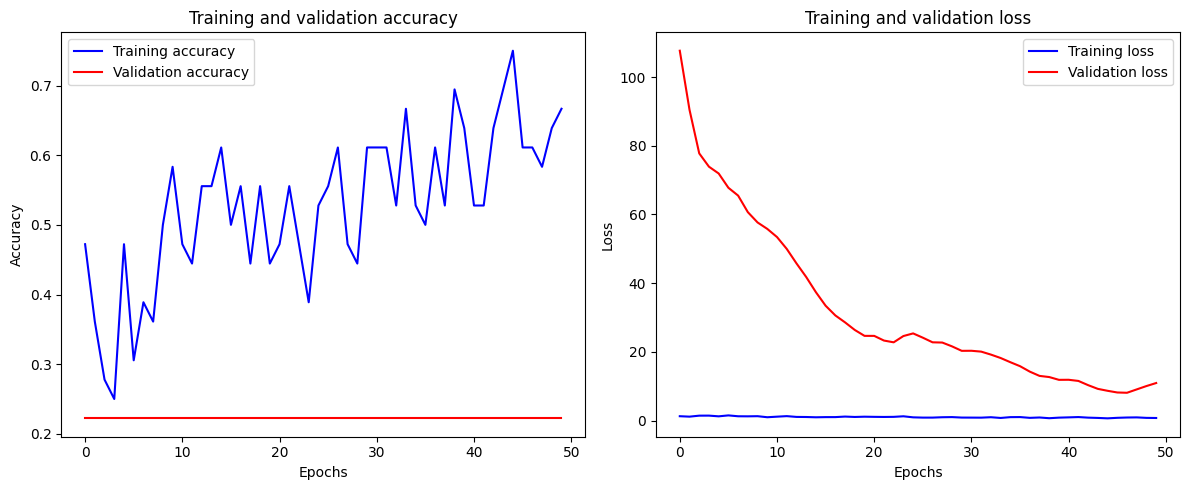

In [25]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], 'b', label='Training accuracy')
plt.plot(history.history['val_accuracy'], 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], 'b', label='Training loss')
plt.plot(history.history['val_loss'], 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [31]:
model.save('model.h5')

In [29]:
data_to_predict = numpy.array([[25.5, 6000, 30.0, 18.0]]) 
y_pred = model.predict(data_to_predict)

predicted_class = numpy.argmax(y_pred, axis=1)
print(f"Prediksi kelas: {predicted_class[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Prediksi kelas: 0


In [30]:
loss, accuracy = model.evaluate(X, y_categorical, verbose=0)
print(f"Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

Loss: 5.7221, Accuracy: 0.6222


In [19]:
converter = tensorflow.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\atmatech\AppData\Local\Temp\tmpg_xqz34h\assets


INFO:tensorflow:Assets written to: C:\Users\atmatech\AppData\Local\Temp\tmpg_xqz34h\assets


Saved artifact at 'C:\Users\atmatech\AppData\Local\Temp\tmpg_xqz34h'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 4), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  2979198177104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2979198176912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2979198177296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2979198177872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2979198179024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2979198177680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2979198179600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2979198179792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2979198178448: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2979198179984: TensorSpec(shape=(), dtype=tf.resource, name=None)
  297919818036